DBSCAN Il s'agit d'un algorithme fondé sur la densité dans la mesure qui s’appuie sur la densité estimée des clusters pour effectuer le partitionnement.

Pour le tester, nous allons générer, pour plus de clarté, 20 points dans l'espace 2D.


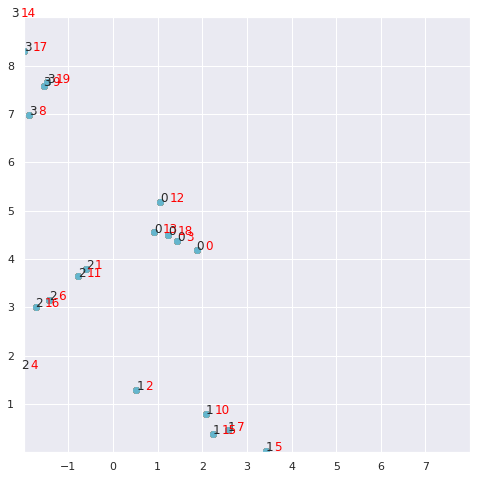

In [ ]:
# Un exemple de l'article sur DBScan
import numpy as np

import os
#import numpy  as np
import urllib.request as url
from array import *

#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

import seaborn as sns
sns.set()

X, y = make_blobs(n_samples=20, centers=4, cluster_std=0.6, random_state=0)
#print(y)
fig, ax = plt.subplots()

for i in range(20):
  
  ax.scatter(X[:,0], X[:,1])
  ax.text(X[i,0], X[i,1], y[i])
  ax.text(X[i,0]+0.2, X[i,1], i, color='red')
  
#print(X[0],X[2])

ax.set(xlim=(-2, 8), xticks=np.arange(-1, 8),
       ylim=(0, 9), yticks=np.arange(1, 9))
fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)
plt.show()
#print(np.linalg.norm(X-X))
#print((((1.87271752-0.52347363)**2)+((4.18069237-1.28983482)**2))**.5)

Nous avons obtenu 4 clusters de densité différente, 5 points chacun.
Trouver des distances entre des points

In [ ]:
from scipy.spatial import distance_matrix
dist_matr=distance_matrix(X, X)
dist_matr

array([[ 0.        ,  2.50907979,  3.19022201,  0.48156107,  4.63376099,
         4.43334988,  3.46512186,  3.79369549,  4.68174479,  4.82160323,
         3.40182733,  2.71595204,  1.28353865,  1.02712518,  6.3609515 ,
         3.81351601,  3.79300518,  5.6552826 ,  0.70822722,  4.82799094],
       [ 2.50907979,  0.        ,  2.75261916,  2.120235  ,  2.52874952,
         5.51742195,  1.05455521,  4.61769573,  3.42794871,  3.89009885,
         4.03991895,  0.24207383,  2.16434792,  1.69666291,  5.46611259,
         4.44767913,  1.37621151,  4.71293114,  1.97943503,  3.95229653],
       [ 3.19022201,  2.75261916,  0.        ,  3.21812831,  2.62018397,
         3.15798768,  2.69671495,  2.21488701,  6.17910833,  6.61735783,
         1.63882854,  2.69108004,  3.92374469,  3.28365762,  8.20687666,
         1.9430635 ,  2.84049932,  7.45234189,  3.2936198 ,  6.67233954],
       [ 0.48156107,  2.120235  ,  3.21812831,  0.        ,  4.38246471,
         4.78276808,  3.12034602,  4.08694226,  

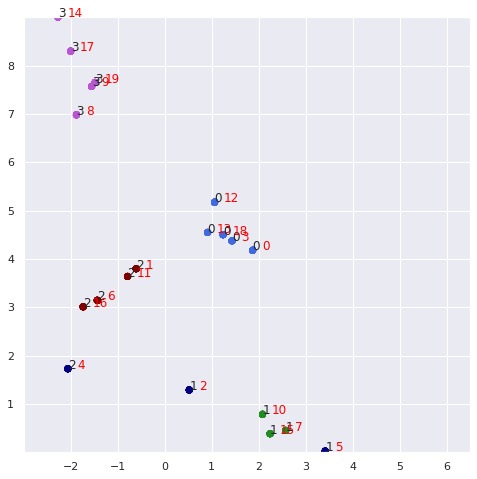

array([ 0,  1, -1,  0, -1, -1,  1,  2,  3,  3,  2,  1,  0,  0,  3,  2,  1,
        3,  0,  3])

In [ ]:

m = DBSCAN(eps=0.9, min_samples=3)#1.65
m.fit(X)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
fig, ax = plt.subplots()
for i in range(20):
  ax.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
  ax.text(X[i,0], X[i,1], y[i])
  ax.text(X[i,0]+0.2, X[i,1], i, color='red')
ax.set(xlim=(-3, 6.5), xticks=np.arange(-2, 6.5),
       ylim=(0, 9), yticks=np.arange(1, 9))
fig.set_figwidth(8)     #  ширина и
fig.set_figheight(8)
plt.show()
#plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))
clusters

[[0.         0.48156107]
 [0.         0.24207383]
 [0.         1.63882854]
 [0.         0.22890088]
 [0.         1.32256852]
 [0.         0.94529036]
 [0.         0.32976483]
 [0.         0.33756904]
 [0.         0.6720609 ]
 [0.         0.10964975]
 [0.         0.43109308]
 [0.         0.24207383]
 [0.         0.64353915]
 [0.         0.33147822]
 [0.         0.75472206]
 [0.         0.33756904]
 [0.         0.32976483]
 [0.         0.75472206]
 [0.         0.22890088]
 [0.         0.10964975]]
[0.10964975 0.10964975 0.22890088 0.22890088 0.24207383 0.24207383
 0.32976483 0.32976483 0.33147822 0.33756904 0.33756904 0.43109308
 0.48156107 0.64353915 0.6720609  0.75472206 0.75472206 0.94529036
 1.32256852 1.63882854]


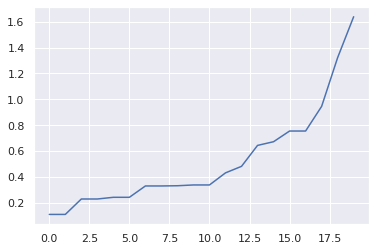

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
print(distances)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
print(distances)
plt.plot(distances)

[1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 5]


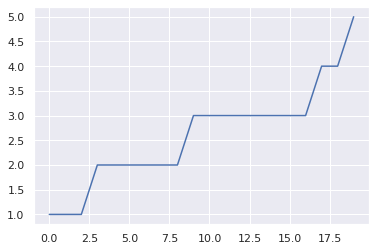

In [ ]:
eps=0.8
counts = []
for i in range(20):
  count=0
  for item in dist_matr[i]:
    if item<=eps:
        count += 1
  counts.append(count)
counts = np.sort(counts)

print(counts)
plt.plot(counts)

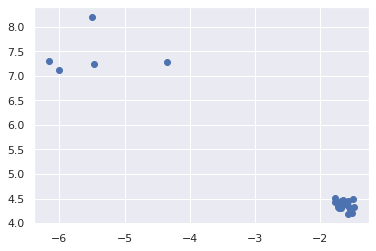

In [ ]:
X1, y1 = make_blobs(n_samples=20, centers=1, cluster_std=0.1, random_state=1)
X2, y2 = make_blobs(n_samples=5, centers=1, cluster_std=0.5, random_state=5)
X3=np.vstack((X2,X1))
#np.hstack((y,y1))
plt.scatter(X3[:,0], X3[:,1])

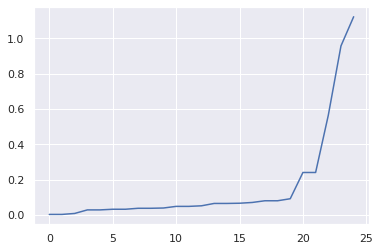

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X3)
distances, indices = nbrs.kneighbors(X3)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

[ 2  3  3  4  5 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20
 20]


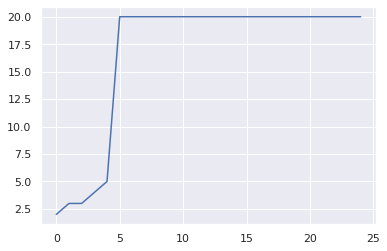

In [ ]:
dist_matr3=distance_matrix(X3, X3)
dist_matr3

eps=1.2
counts = []
for i in range(25):
  count=0
  for item in dist_matr3[i]:
    if item<=eps:
        count += 1
  counts.append(count)
counts = np.sort(counts)

print(counts)
plt.plot(counts)

array([ 0, -1,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

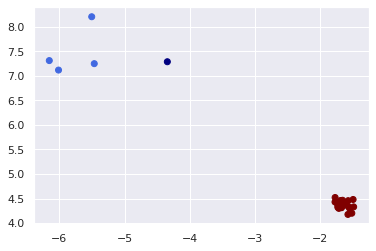

In [ ]:
m = DBSCAN(eps=1.1, min_samples=4) #18
m.fit(X3)
clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.scatter(X3[:,0], X3[:,1], c=vectorizer(clusters))
clusters

In [ ]:
def mask_cluster (nb_cluster):
    cluster = np.zeros((1,NB_CLUSTERS))
    cluster[0,nb_cluster-1]=1
    return cluster

NB_CLUSTERS=5
NB_DEPTH=5808
NB_N=20

values_i = np.zeros((NB_DEPTH,NB_N,NB_N))
cluster_i = np.zeros((NB_DEPTH,NB_CLUSTERS))
nb_eloignements = np.zeros((NB_DEPTH))
cluster_ii = np.zeros((NB_DEPTH,NB_N,NB_CLUSTERS))

fh = url.urlopen( "https://github.com/TahiriNadia/ML_DL_Classification_Trees/raw/master/data/simulation/simulation_dataset")
depth = 0
l_i = 1

while True:
    ligne = fh.readline()
    nb_arbre,nb_taxon,nb_cluster,percent_noise,nb_eloignement = ligne.split()
    cluster_i[depth]=mask_cluster(int(nb_cluster))
    ##nb_eloignements[depth]=mask_cluster(int(nb_eloignement))
    #-taxon_1[depth]=mask_cluster(int(nb_cluster))
    #cluster_ii[depth]=mask_cluster2(int(nb_cluster), int(nb_arbre))
    nb_eloignements[depth]=nb_eloignement
    for i in range(0, int(nb_arbre)):
        ligne = fh.readline()
        values_i [depth,i,:] = ligne.split()

    ligne = fh.readline()
    depth = depth + 1
    l_i = l_i + int(nb_arbre) + 2
    if not ligne:
      break
fh.close

<bound method HTTPResponse.close of <http.client.HTTPResponse object at 0x7f24f435d810>>

In [ ]:
loss=0
nnn=0
for nn in range(5808):
#nn=3555
  
  distances5=values_i[nn]
#.flatten()
#print(distances)
#print(values_i[nn])
  distances5 = np.sort(distances5[:])
#print(distances5)
#distances = distances[:,1]
  distances5 = np.sort(distances5[:,1], axis=0)
  #---plt.plot( distances5)
#print(distances5)
  
  eps=distances5[-1] #dist_matr6[-1]
  if nb_eloignements[nn]==75:
    if eps==0: eps=0.1 
    nnn=nnn+1
    distances5=values_i[nn]
    #eps=eps
    #--print("***************")
    #--print("eloignement",nb_eloignements[nn])
    #--print(nn)
    #--print(cluster_i[nn])

    counts = []
    for i in range(20):
      count=0
      for item in distances5[i]:
        if item<=eps:
          count += 1
      counts.append(count)
    counts = np.sort(counts)

#print(counts)
    #---plt.plot(counts)
  #eps=distances5[-1]
    if min(counts)>3: 
      min_samples=min(counts)
    else:
      min_samples=3
    #min_samples=1
    m = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
    labels=m.fit(values_i[nn]).labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    #--print (n_clusters_)
    if n_clusters_!=(np.argmax(cluster_i[nn])+1): loss=loss+1; #--print("+++")
    #argmax=np.argmax(cluster_i[nn])
    #--print("argmax=",np.argmax(cluster_i[nn])+1)
    clusters = m.labels_
#colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.scatter(X3[:,0], X3[:,1], c=vectorizer(clusters))
    #--print("clsters=",clusters)
    #--print("N=",nnn)
    #--print("loss=",loss)
print("N=",nnn)
print("Loss=",loss)




N= 915
Loss= 214


[0.       0.538462 0.538462 0.615385 0.615385 0.615385 0.615385 0.692308
  0.692308 0.769231 0.769231 0.769231 0.769231 0.769231 0.846154 0.846154
  0.846154 0.846154 0.846154 0.846154]
  

In [ ]:

  


#mmm=0.4
#m = DBSCAN(eps=mmm, min_samples=3, metric='precomputed')
#labels=m.fit(values_i[nn], sample_weight=2).labels_
